# Shark Attacks

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
shark_atck_df = pd.read_csv('attacks.csv', encoding='latin-1')
shark_atck_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
shark_atck_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
Case Number               8702 non-null object
Date                      6302 non-null object
Year                      6300 non-null float64
Type                      6298 non-null object
Country                   6252 non-null object
Area                      5847 non-null object
Location                  5762 non-null object
Activity                  5758 non-null object
Name                      6092 non-null object
Sex                       5737 non-null object
Age                       3471 non-null object
Injury                    6274 non-null object
Fatal (Y/N)               5763 non-null object
Time                      2948 non-null object
Species                   3464 non-null object
Investigator or Source    6285 non-null object
pdf                       6302 non-null object
href formula              6301 non-null object
href                      6302 non-null obje

The dataframe has a total of 25723 entries and 24 columns. All of the columns have more than 17,000 null values. Checking all the columns' names, I can deduce that not all of them will be useful for my research. Let's select the ones that will be, and generate a new dataframe with them:

 - Case Number, Date, Year, Case Number 1 & 2: checking the sample above I can see that every of those columns is related with the date the attack took place. The one with more non-null values is 'Case Number', with 8702. I would like to check if this column covers the rest (if some dates are not in 'Case Number' but in other column).

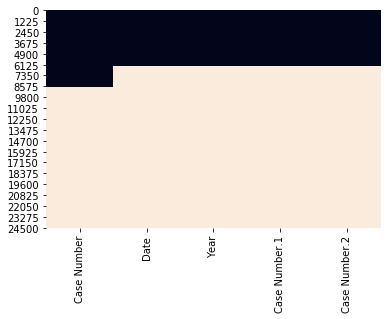

In [4]:
dates = shark_atck_df.iloc[:,[0,1,2,19,20]]
sns.heatmap(dates.isnull(), cbar=False)

As the heatmap shows, all the dates in the rest of the columns and beyond are covered by 'Case Number', so I will use that column as date.

 - Time: with nearly 3000 non-nulls, I will keep it as it could be usefull.
 - Country, Area, Location: more than 5700 rows with all this information covered. The 'Country' column will be the main source related with this information, but I prefer to keep also 'Area' and 'Location', even though they have less non-null values.
 - Sex, Age: more than 5700 non-null values for sex; more than 3400 for Age.
 - Activity: what the person attacked was doing when the attack happened. There are more than 5700 non-nulls.
 - Type: the type of attack, there are nearly 6300 non-null values.
 - Species: the species of the shark, with nearly 3500 non-null values.
 - Injury & Fatal: the kind of injury and if it was rather fatal or not. Nearly 6300 non-null entries for the injuries; more than 5700 for the 'Fatal' column.

Let's create the new dataframe with the selected columns sorted, and change the name of 'Case Number' to 'Date'.

In [5]:
attacks_df = shark_atck_df.iloc[:,[0,13,4,5,6,9,10,7,3,14,11,12]]
attacks_df.rename(columns={'Case Number': 'Date'}, inplace=True)
attacks_df.head()

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Date,Time,Country,Area,Location,Sex,Age,Activity,Type,Species,Injury,Fatal (Y/N)
0,2018.06.25,18h00,USA,California,"Oceanside, San Diego County",F,57,Paddling,Boating,White shark,"No injury to occupant, outrigger canoe and pad...",N
1,2018.06.18,14h00 -15h00,USA,Georgia,"St. Simon Island, Glynn County",F,11,Standing,Unprovoked,NaN,Minor injury to left thigh,N
2,2018.06.09,07h45,USA,Hawaii,"Habush, Oahu",M,48,Surfing,Invalid,NaN,Injury to left lower leg from surfboard skeg,N
3,2018.06.08,NaN,AUSTRALIA,New South Wales,Arrawarra Headland,M,NaN,Surfing,Unprovoked,2 m shark,Minor injury to lower leg,N
4,2018.06.04,NaN,MEXICO,Colima,La Ticla,M,NaN,Free diving,Provoked,"Tiger shark, 3m",Lacerations to leg & hand shark PROVOKED INCIDENT,N


Now let's see through a heatmap how is the distribution of the non-null values in our new dataframe, in order to see how many rows have all its values as null:

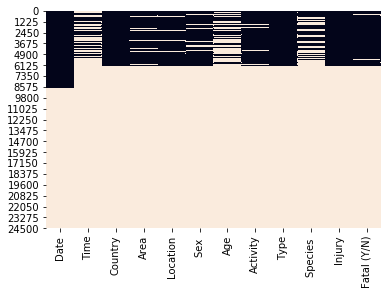

In [6]:
sns.heatmap(attacks_df.isnull(), cbar=False)

In [7]:
attacks_df.count().sort_values(ascending=False)

Date           8702
Type           6298
Injury         6274
Country        6252
Area           5847
Fatal (Y/N)    5763
Location       5762
Activity       5758
Sex            5737
Age            3471
Species        3464
Time           2948
dtype: int64

As the heatmap shows, 2/3 of the dataframe has all its rows filled with null values in absolutely all its columns. Of course, all this rows will be deleted. Of the reminder third, at least 1/4 has just the 'Date' column filled, so I should get rid of those values too. 

In order to attemp this, I will keep those rows where the values in the column 'Type' are non-null, as it is the column with the largest number of those after 'Date'. This will let me with a 6298-row dataframe.

In [8]:
attacks_df.dropna(how='all', subset=['Type'], inplace=True)
attacks_df.head()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Time,Country,Area,Location,Sex,Age,Activity,Type,Species,Injury,Fatal (Y/N)
0,2018.06.25,18h00,USA,California,"Oceanside, San Diego County",F,57,Paddling,Boating,White shark,"No injury to occupant, outrigger canoe and pad...",N
1,2018.06.18,14h00 -15h00,USA,Georgia,"St. Simon Island, Glynn County",F,11,Standing,Unprovoked,NaN,Minor injury to left thigh,N
2,2018.06.09,07h45,USA,Hawaii,"Habush, Oahu",M,48,Surfing,Invalid,NaN,Injury to left lower leg from surfboard skeg,N
3,2018.06.08,NaN,AUSTRALIA,New South Wales,Arrawarra Headland,M,NaN,Surfing,Unprovoked,2 m shark,Minor injury to lower leg,N
4,2018.06.04,NaN,MEXICO,Colima,La Ticla,M,NaN,Free diving,Provoked,"Tiger shark, 3m",Lacerations to leg & hand shark PROVOKED INCIDENT,N


Checking column by column, the first possible problem we can see is the format of the 'Date' column. As it can be seen with the value_counts() function, some dates have letters or marks after them. We should remove those in order to use the Pandas function 'to_datetime()' without any issues. Let's use a regex operation: 

In [9]:
attacks_df['Date'].value_counts()

2005.04.06      2
1966.12.26      2
2012.09.02.b    2
1920.00.00.b    2
2009.12.18      2
               ..
1995.04.09.b    1
1963.04.08      1
2008.03.07      1
2010.10.25      1
2015.03.18      1
Name: Date, Length: 6281, dtype: int64

In [15]:
attacks_df['Date'] = [re.sub(r"[A-Za-z.]", "", str(x)) for x in attacks_df['Date']]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
attacks_df.iloc[:,0] = pd.to_datetime(attacks_df.iloc[:,0], format='%Y-%m-%d', errors='coerce')

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [22]:
attacks_df['Date'].value_counts(dropna=False)

NaT           889
2003-10-05      5
2001-04-12      5
1995-07-28      5
1970-01-23      4
             ... 
1892-06-20      1
1896-11-01      1
1970-09-02      1
1960-05-24      1
1967-09-20      1
Name: Date, Length: 4744, dtype: int64

In [41]:
dates = shark_atck_df.iloc[:,[0,1,2,19,20]]

In [43]:
dates['Date'].replace('nan', np.NaN, inplace=True)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [45]:
dates['Date'].value_counts(dropna=False)

NaN            19421
1957              11
1942               9
1956               8
1950               7
               ...  
27-May-1930        1
05-Feb-1962        1
06-Nov-2008        1
29-Jul-1961        1
26-Jul-1986        1
Name: Date, Length: 5391, dtype: int64

In [48]:
dates.dropna(how='all', inplace=True)
dates

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Case Number,Date,Year,Case Number.1,Case Number.2
0,2018.06.25,25-Jun-2018,2018.0,2018.06.25,2018.06.25
1,2018.06.18,18-Jun-2018,2018.0,2018.06.18,2018.06.18
2,2018.06.09,09-Jun-2018,2018.0,2018.06.09,2018.06.09
3,2018.06.08,08-Jun-2018,2018.0,2018.06.08,2018.06.08
4,2018.06.04,04-Jun-2018,2018.0,2018.06.04,2018.06.04
...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN
